[Cours](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/3/iterative)

Dans ce cours, on apprend que ce n'est pas forcément lors du 1er prompt qu'on obtient ce que l'on souhaite, il n'y a pas de prompt modélisé

Date : 05-12-2023

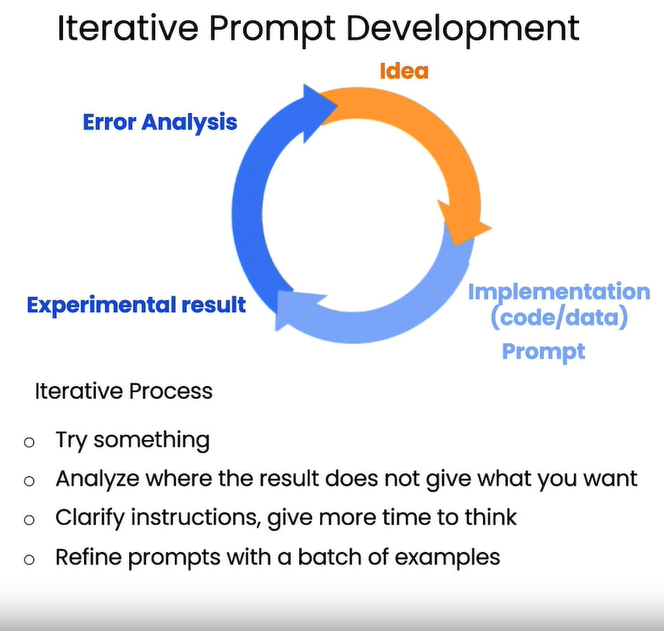

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

# openai.api_key  = os.getenv('OPENAI_API_KEY')

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In [3]:
# Fiche d'information sur une chaise
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

Prompt souhaité : </br>
Votre tâche consiste à aider une équipe de marketing à créer une 
description d'un produit pour un site web de vente au détail 
sur la base d'une fiche technique.</br>
Rédigez une description du produit en vous basant sur les informations 
fournies dans les spécifications techniques délimitées par des 
des triples crochets

In [4]:
# Prompt
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Introducing our stunning mid-century inspired office chair, the perfect addition to any home or business setting. This chair is part of a beautiful family of office furniture, including filing cabinets, desks, bookcases, meeting tables, and more, all designed with a timeless mid-century aesthetic.

One of the standout features of this chair is the variety of customization options available. You can choose from several shell colors and base finishes to perfectly match your existing decor. The chair is available with either plastic back and front upholstery or full upholstery in a range of 10 fabric and 6 leather options, allowing you to create a look that is uniquely yours.

The chair is also available with or without armrests, giving you the flexibility to choose the option that best suits your needs. The base finish options include stainless steel, matte black, gloss white, or chrome, ensuring that you can find the perfect match for your space.

In terms of construction, this chair is

Complément du prompt précédent : </br>
Utilisez au maximum 50 mots

In [5]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Introducing our mid-century inspired office chair, part of a stunning furniture collection. With various color and finish options, choose between plastic or full upholstery in fabric or leather. The chair features a durable aluminum base with 5 wheels and pneumatic height adjustment. Perfect for home or business use. Made in Italy.


In [6]:
# Contrôle du nombre de mots générés
len(response.split())

51

En complément du précédent prompt : </br>
La description est destinée aux détaillants de meubles, 
doit donc être de nature technique et se concentrer sur les 
matériaux dont le produit est constitué.

In [7]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our mid-century inspired office chair, part of a beautiful furniture collection. With various shell colors and base finishes, it offers versatility for any setting. Choose between plastic or full upholstery in a range of fabric and leather options. The chair features a durable aluminum base and pneumatic chair adjustment for easy height customization. Made in Italy.


En complément du précédent prompt :</br>
À la fin de la description, incluez les 7 caractères de l'ID du produit dans la spécification technique.

In [8]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our mid-century inspired office chair, part of a beautiful family of furniture. This chair offers a range of options, including different shell colors and base finishes. Choose between plastic or full upholstery in various fabric and leather options. The chair is constructed with a 5-wheel plastic coated aluminum base and features a pneumatic chair adjust for easy raise/lower action. With its sleek design and multiple customization options, this chair is suitable for both home and business settings. Made in Italy.

Product IDs: SWC-100, SWC-110


En complément du précédent prompt : </br>
Après la description, incluez un tableau qui donne le dimensions du produit. Le tableau doit comporter deux colonnes. Dans la première colonne, indiquez le nom de la dimension. Dans la deuxième colonne, incluez les mesures en pouces uniquement. Donnez au tableau le titre « Dimensions du produit ». Formatez tout ce qui peut être utilisé dans un site Web au format HTML. Placez la description dans un élément.

In [9]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

<div>
  <h2>Product Description</h2>
  <p>
    Introducing our latest addition to our mid-century inspired office furniture collection - the SWC Chair. This chair is part of a beautiful family of furniture that includes filing cabinets, desks, bookcases, meeting tables, and more. With its sleek design and customizable options, the SWC Chair is the perfect choice for any home or business setting.
  </p>
  <p>
    The SWC Chair offers several options for customization. You can choose from a variety of shell colors and base finishes to match your existing decor. The chair is available with plastic back and front upholstery or full upholstery in a range of fabric and leather options. The base finish options include stainless steel, matte black, gloss white, or chrome. You can also choose whether to have armrests or not, depending on your preference.
  </p>
  <p>
    The construction of the SWC Chair is top-notch. It features a 5-wheel plastic coated aluminum base, ensuring stability and du

Recours aux librairie pour afficher les données souhaitées ci-avant sous la forme d'un tableau en fin de réponse et mise en forme des caractères

In [10]:
from IPython.display import display, HTML

In [11]:
display(HTML(response))

Dimension,Measurement (inches)
Width,"20.87"""
Depth,"20.08"""
Height,"31.50"""
Seat Height,"17.32"""
Seat Depth,"16.14"""
